# Edgotyping Data Analyses

In [10]:
import pandas as pd 
import polars as pl
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading data

In [11]:
edgotyping_scores_df = pl.read_excel("../1_inputs/VarChAMP1percentEdgotypingScores_SeqConfirmed_ONLY.xlsx")
edgotyping_scores_df

ad_orf_id,ad_mut_id,db_orf_id,db_mut_id,condition_name,retest_batch,media_control,consensus_score,ad_symbol,symbol,aa_change,nt_change,ensembl_gene_id,collection,clinvar_clnsig_clean,gnomad_af,StarStatus,allele_0,final_score,final_score_wt,edgotype,edgotype_wt_2,seq_confirmation,seq_confirmation_wt,db_node_seq_confirmation,combo SWIM+pool,POOL only,SWIM only
i64,i64,i64,i64,str,str,bool,i64,str,str,str,str,str,str,str,f64,i64,str,i64,i64,str,str,i64,i64,i64,bool,bool,bool
145,0,145,200059,"""LWH1""","""VUSAPWT1B2""",false,2,"""PTS""","""PTS""","""Arg25Gln""","""74G>A""","""ENSG00000150787""","""CEGS2""","""1_Pathogenic""",6.9900e-7,2,"""PTS_Arg25Gln""",2,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true
145,0,145,200065,"""LWH1""","""VUSAPWT1B2""",false,2,"""PTS""","""PTS""","""Asp116Gly""","""347A>G""","""ENSG00000150787""","""CEGS2""","""3_Conflicting""",0.000004,1,"""PTS_Asp116Gly""",2,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true
152,0,5066,201830,"""LWH1""","""VUSAPWT1B2""",false,3,"""TRIM27""","""BAG3""","""Arg258Trp""","""772C>T""","""ENSG00000151929""","""CEGS2""","""2_Benign""",0.0004399,2,"""BAG3_Arg258Trp""",3,3,"""not perturbed""","""not perturbed""",1,1,1,true,true,true
152,0,5066,201831,"""LWH1""","""VUSAPWT1B2""",false,0,"""TRIM27""","""BAG3""","""Leu462Pro""","""1385T>C""","""ENSG00000151929""","""CEGS2""","""1_Pathogenic""",null,1,"""BAG3_Leu462Pro""",0,3,"""perturbed""","""perturbed""",1,1,2,true,true,true
152,0,5066,201832,"""LWH1""","""VUSAPWT1B2""",false,2,"""TRIM27""","""BAG3""","""Pro380Ser""","""1138C>T""","""ENSG00000151929""","""CEGS2""","""2_Benign""",0.000499,2,"""BAG3_Pro380Ser""",2,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
100080183,0,71191,205704,"""LWH1""","""VUSAPWT6B1""",false,4,"""MEIS3""","""SUOX""","""Ala265Asp""","""794C>A""","""ENSG00000139531""","""CEGS2""","""4_VUS""",0.000042,1,"""SUOX_Ala265Asp""",4,4,"""not perturbed""","""not perturbed""",1,1,1,true,true,true
100080183,0,71191,205705,"""LWH1""","""VUSAPWT6B1""",false,4,"""MEIS3""","""SUOX""","""Gly530Asp""","""1589G>A""","""ENSG00000139531""","""CEGS2""","""1_Pathogenic""",6.8412e-7,null,"""SUOX_Gly530Asp""",4,4,"""not perturbed""","""not perturbed""",1,1,2,true,true,true
100080871,0,5066,201830,"""LWH1""","""VUSAPWT1B2""",false,4,"""PRDM6""","""BAG3""","""Arg258Trp""","""772C>T""","""ENSG00000151929""","""CEGS2""","""2_Benign""",0.0004399,2,"""BAG3_Arg258Trp""",4,3,"""inconclusive""","""inconclusive""",1,1,1,true,true,true


In [12]:
edgotyping_scores_alleles_df = pl.read_excel("../1_inputs/VarChampPillarEdgotypingScoresWithAlleleInfo_ToShare.xlsx")
edgotyping_scores_alleles_df#["seq_confirmed_final"].unique()

id,category,symbol,ccsb_mutation_id,ccsb_allele_id,db_orf_id,cv_allele_id,spdi,clinical_significance_simple,nt_change,aa_change,ensembl_protein_id,aa_change_ensp,ad_orf_id,ad_symbol,standard_batch,retest_pla,retest_pla_full,retest_pos,final_score,final_score_wt,final_score_wt_huri,edgotype,edgotype_wt_2,seq_confirmed_wt_ppi,seq_confirmed_allele_ppi,seq_confirmed_final
i64,str,str,str,str,i64,i64,str,str,str,str,str,str,i64,str,str,i64,str,str,str,i64,i64,str,str,i64,i64,i64
1,"""CAVA""","""CTCF""","""CCSBVarC010816""","""ALE00008908""",6173,208297,"""NC_000016.10:67636779:C:T""","""benign""","""1927C>T""","""Pro643Ser""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Pro643Ser""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""F09""","""2""",2,4,"""NA""","""not perturbed""",1,1,1
2,"""CAVA""","""CTCF""","""CCSBVarC010858""","""ALE00014571""",6173,799962,"""NC_000016.10:67626562:C:G""","""Pathogenic""","""1365C>G""","""His455Gln""","""ENSP00000264010.4""","""ENSP00000264010.4:p.His455Gln""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""H09""","""2""",2,4,"""NA""","""not perturbed""",1,1,1
3,"""CAVA""","""CTCF""","""CCSBVarC010870""","""ALE00013232""",6173,260121,"""NC_000016.10:67621454:A:G""","""Pathogenic""","""1220A>G""","""Tyr407Cys""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Tyr407Cys""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""A10""","""2""",2,4,"""NA""","""not perturbed""",1,1,1
4,"""CAVA""","""CTCF""","""CCSBVarC010851""","""ALE00013946""",6173,422102,"""NC_000016.10:67616816:C:T""","""Pathogenic""","""1024C>T""","""Arg342Cys""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Arg342Cys""",9637,"""TRAF2""","""HsVCplarAs1""",1,"""HsVCplarAs1_001""","""G09""","""AA""",2,4,"""NA""","""NA""",1,1,1
6,"""CAVA""","""CTCF""","""CCSBVarC010816""","""ALE00008908""",6173,208297,"""NC_000016.10:67636779:C:T""","""benign""","""1927C>T""","""Pro643Ser""","""ENSP00000264010.4""","""ENSP00000264010.4:p.Pro643Ser""",9016,"""ZMYM6""","""HsVCplarAs6""",1,"""HsVCplarAs6_001""","""C01""","""2""",2,1,"""NA""","""not perturbed""",1,1,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
11163,"""CAVA""","""RAF1""","""CCSBVarC008858""","""ALE00013778""",732,496336,"""NC_000003.12:12604195:A:C""","""Pathogenic""","""775T>G""","""Ser259Ala""","""ENSP00000251849.4""","""ENSP00000251849.4:p.Ser259Ala""",5462,"""NRAS""","""HsVCplarAs6""",25,"""HsVCplarAs6_025""","""B02""","""NULL""",null,0,"""NULL""","""NULL""",1,1,1
11164,"""CAVA""","""RAF1""","""CCSBVarC008860""","""ALE00011641""",732,28999,"""NC_000003.12:12584624:G:C""","""Pathogenic""","""1837C>G""","""Leu613Val""","""ENSP00000251849.4""","""ENSP00000251849.4:p.Leu613Val""",5462,"""NRAS""","""HsVCplarAs6""",25,"""HsVCplarAs6_025""","""C02""","""NULL""",null,0,"""NULL""","""NULL""",1,1,1
11165,"""CAVA""","""RAF1""","""CCSBVarC008862""","""ALE00012143""",732,49083,"""NC_000003.12:12599717:C:G""","""Pathogenic""","""1082G>C""","""Gly361Ala""","""ENSP00000251849.4""","""ENSP00000251849.4:p.Gly361Ala""",5462,"""NRAS""","""HsVCplarAs6""",25,"""HsVCplarAs6_025""","""D02""","""NULL""",null,0,"""NULL""","""NULL""",1,1,1


In [13]:
overlapped_cols = set(edgotyping_scores_df.columns).intersection(set(edgotyping_scores_alleles_df.columns))
combined_df = pl.concat([
    edgotyping_scores_df.select(pl.col(overlapped_cols)),
    edgotyping_scores_alleles_df.select(pl.col(overlapped_cols))
], how="vertical_relaxed").with_columns(
    pl.concat_str([pl.col("symbol"), pl.col("aa_change")], separator="_").alias("gene_variant")
)
print("Unique variants profiled:", combined_df.unique(subset="gene_variant"))
display(combined_df)

Unique variants profiled: shape: (968, 11)
┌───────────┬───────────┬────────────┬────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ ad_orf_id ┆ nt_change ┆ final_scor ┆ symbol ┆ … ┆ final_scor ┆ ad_symbol ┆ edgotype_ ┆ gene_vari │
│ ---       ┆ ---       ┆ e_wt       ┆ ---    ┆   ┆ e          ┆ ---       ┆ wt_2      ┆ ant       │
│ i64       ┆ str       ┆ ---        ┆ str    ┆   ┆ ---        ┆ str       ┆ ---       ┆ ---       │
│           ┆           ┆ i64        ┆        ┆   ┆ str        ┆           ┆ str       ┆ str       │
╞═══════════╪═══════════╪════════════╪════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 6534      ┆ 1243C>T   ┆ null       ┆ ALAS2  ┆ … ┆ null       ┆ BANP      ┆ NA        ┆ ALAS2_Arg │
│           ┆           ┆            ┆        ┆   ┆            ┆           ┆           ┆ 415Cys    │
│ 100070216 ┆ 1451A>C   ┆ 3          ┆ IMPDH1 ┆ … ┆ 2          ┆ RNF4      ┆ inconclus ┆ IMPDH1_As │
│           ┆           ┆            ┆        ┆ 

ad_orf_id,nt_change,final_score_wt,symbol,db_orf_id,edgotype,aa_change,final_score,ad_symbol,edgotype_wt_2,gene_variant
i64,str,i64,str,i64,str,str,str,str,str,str
145,"""74G>A""",3,"""PTS""",145,"""inconclusive""","""Arg25Gln""","""2""","""PTS""","""inconclusive""","""PTS_Arg25Gln"""
145,"""347A>G""",3,"""PTS""",145,"""inconclusive""","""Asp116Gly""","""2""","""PTS""","""inconclusive""","""PTS_Asp116Gly"""
152,"""772C>T""",3,"""BAG3""",5066,"""not perturbed""","""Arg258Trp""","""3""","""TRIM27""","""not perturbed""","""BAG3_Arg258Trp"""
152,"""1385T>C""",3,"""BAG3""",5066,"""perturbed""","""Leu462Pro""","""0""","""TRIM27""","""perturbed""","""BAG3_Leu462Pro"""
152,"""1138C>T""",3,"""BAG3""",5066,"""inconclusive""","""Pro380Ser""","""2""","""TRIM27""","""inconclusive""","""BAG3_Pro380Ser"""
…,…,…,…,…,…,…,…,…,…,…
5462,"""775T>G""",null,"""RAF1""",732,"""NULL""","""Ser259Ala""","""NULL""","""NRAS""","""NULL""","""RAF1_Ser259Ala"""
5462,"""1837C>G""",null,"""RAF1""",732,"""NULL""","""Leu613Val""","""NULL""","""NRAS""","""NULL""","""RAF1_Leu613Val"""
5462,"""1082G>C""",null,"""RAF1""",732,"""NULL""","""Gly361Ala""","""NULL""","""NRAS""","""NULL""","""RAF1_Gly361Ala"""


In [14]:
edgotyping_scores_final = combined_df.with_columns(
    pl.col("edgotype_wt_2").replace(["NA", "NULL"], [None, None]).alias("edgotype_wt_final")
).drop_nulls(subset="edgotype_wt_final")
print("Unique variants with edgotyping data:", edgotyping_scores_final.unique(subset="gene_variant"))

Unique variants with edgotyping data: shape: (836, 12)
┌───────────┬───────────┬────────────┬────────┬───┬───────────┬────────────┬───────────┬───────────┐
│ ad_orf_id ┆ nt_change ┆ final_scor ┆ symbol ┆ … ┆ ad_symbol ┆ edgotype_w ┆ gene_vari ┆ edgotype_ │
│ ---       ┆ ---       ┆ e_wt       ┆ ---    ┆   ┆ ---       ┆ t_2        ┆ ant       ┆ wt_final  │
│ i64       ┆ str       ┆ ---        ┆ str    ┆   ┆ str       ┆ ---        ┆ ---       ┆ ---       │
│           ┆           ┆ i64        ┆        ┆   ┆           ┆ str        ┆ str       ┆ str       │
╞═══════════╪═══════════╪════════════╪════════╪═══╪═══════════╪════════════╪═══════════╪═══════════╡
│ 100070263 ┆ 446T>A    ┆ 2          ┆ CAPN3  ┆ … ┆ RUFY3     ┆ not        ┆ CAPN3_Ile ┆ not       │
│           ┆           ┆            ┆        ┆   ┆           ┆ perturbed  ┆ 149Lys    ┆ perturbed │
│ 4361      ┆ 559G>A    ┆ 2          ┆ STAR   ┆ … ┆ MAGEA11   ┆ perturbed  ┆ STAR_Val1 ┆ perturbed │
│           ┆           ┆           

In [6]:
# edgotyping_scores_final.write_csv("../3_outputs/edgotyping_final_combined_scores.csv")
# edgotyping_scores_final.write_csv("../../../3_integrated_assay_analyses/1_inputs/ppi/edgotyping_final_combined_scores.csv")

In [15]:
edgotyping_scores_final.group_by("gene_variant")

ad_orf_id,nt_change,final_score_wt,symbol,db_orf_id,edgotype,aa_change,final_score,ad_symbol,edgotype_wt_2,gene_variant,edgotype_wt_final
i64,str,i64,str,i64,str,str,str,str,str,str,str
145,"""74G>A""",3,"""PTS""",145,"""inconclusive""","""Arg25Gln""","""2""","""PTS""","""inconclusive""","""PTS_Arg25Gln""","""inconclusive"""
145,"""347A>G""",3,"""PTS""",145,"""inconclusive""","""Asp116Gly""","""2""","""PTS""","""inconclusive""","""PTS_Asp116Gly""","""inconclusive"""
152,"""772C>T""",3,"""BAG3""",5066,"""not perturbed""","""Arg258Trp""","""3""","""TRIM27""","""not perturbed""","""BAG3_Arg258Trp""","""not perturbed"""
152,"""1385T>C""",3,"""BAG3""",5066,"""perturbed""","""Leu462Pro""","""0""","""TRIM27""","""perturbed""","""BAG3_Leu462Pro""","""perturbed"""
152,"""1138C>T""",3,"""BAG3""",5066,"""inconclusive""","""Pro380Ser""","""2""","""TRIM27""","""inconclusive""","""BAG3_Pro380Ser""","""inconclusive"""
…,…,…,…,…,…,…,…,…,…,…,…
70191,"""839T>A""",2,"""CAPN3""",8876,"""NA""","""Met280Lys""","""2""","""MAP1LC3C""","""not perturbed""","""CAPN3_Met280Lys""","""not perturbed"""
100070263,"""85C>G""",2,"""CAPN3""",8876,"""NA""","""Arg29Gly""","""2""","""RUFY3""","""not perturbed""","""CAPN3_Arg29Gly""","""not perturbed"""
70191,"""85C>G""",2,"""CAPN3""",8876,"""NA""","""Arg29Gly""","""2""","""MAP1LC3C""","""not perturbed""","""CAPN3_Arg29Gly""","""not perturbed"""


In [20]:
variant_ppi_perturb_stats = (
    edgotyping_scores_final
    .group_by("gene_variant")
    .agg([
        # Total occurrences per gene_variant
        pl.len().alias("total_occurrences"),
        # Count each edgotype category
        pl.col("edgotype_wt_final").filter(pl.col("edgotype") == "not perturbed").len().alias("not_perturbed_count"),
        pl.col("edgotype_wt_final").filter(pl.col("edgotype") == "inconclusive").len().alias("inconclusive_count"),
        pl.col("edgotype_wt_final").filter(pl.col("edgotype") == "perturbed").len().alias("perturbed_count"),
    ])
    .with_columns([
        # Calculate percentages
        (pl.col("not_perturbed_count") / pl.col("total_occurrences") * 100).round(2).alias("not_perturbed_percentage"),
        (pl.col("inconclusive_count") / pl.col("total_occurrences") * 100).round(2).alias("inconclusive_percentage"),
        (pl.col("perturbed_count") / pl.col("total_occurrences") * 100).round(2).alias("perturbed_percentage"),
    ])
    .sort("gene_variant")
)
print(variant_ppi_perturb_stats)

shape: (836, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ gene_varia ┆ total_occu ┆ not_pertur ┆ inconclus ┆ perturbed ┆ not_pertu ┆ inconclus ┆ perturbed │
│ nt         ┆ rrences    ┆ bed_count  ┆ ive_count ┆ _count    ┆ rbed_perc ┆ ive_perce ┆ _percenta │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ entage    ┆ ntage     ┆ ge        │
│ str        ┆ u32        ┆ u32        ┆ u32       ┆ u32       ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆           ┆           ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ ACSF3_Arg1 ┆ 3          ┆ 0          ┆ 0         ┆ 3         ┆ 0.0       ┆ 0.0       ┆ 100.0     │
│ 0Trp       ┆            ┆            ┆           ┆           ┆           ┆           ┆           │
│ ACSF3_Arg4 ┆ 6          ┆ 0          ┆ 2         ┆ 4         ┆ 0.0       

In [52]:
# variant_ppi_perturb_stats.write_csv("../../../3_integrated_assay_analyses/1_inputs/ppi/edgotyping_perturb_sum_stats.csv")

## 2. ClinVar Analysis

In [26]:
# process metadata
metadata = pl.DataFrame(pd.read_csv(f"../../../1_allele_collection/3_outputs/varchamp_alleles_clinvar_gnomad_dbnsfp_sc.tsv", sep="\t", low_memory=False))
mut_cols = ["mutation_id_rc4", "mutation_id_cegs2", "mutation_id_edgotyping3"]
id_vars = [col for col in metadata.columns if col not in mut_cols]
metadata = metadata.unpivot(index=id_vars, 
                            on=mut_cols,
                            variable_name="mutation_collection",
                            value_name="mut_id")

priority_col = ["orf_id", "mut_id", "symbol", "aa_change", "ensembl_gene_id", "clinvar_clnsig_clean", "gnomad_af", "StarStatus"]
metadata = metadata.select(priority_col).filter(~pl.col("mut_id").is_null()).with_columns(
    pl.col("mut_id").cast(pl.Int64).alias("mut_id"),
    pl.col("orf_id").cast(pl.Int64).alias("orf_id"),
    pl.concat_str([pl.col("symbol"), pl.col("aa_change")], separator="_").alias("gene_variant")
)
metadata

orf_id,mut_id,symbol,aa_change,ensembl_gene_id,clinvar_clnsig_clean,gnomad_af,StarStatus,gene_variant
i64,i64,str,str,str,str,f64,f64,str
3743,6896,"""LAMP2""","""Val310Ile""","""ENSG00000005893""","""1_Pathogenic""",null,2.0,"""LAMP2_Val310Ile"""
71892,36336,"""TH""","""Thr245Pro""","""ENSG00000180176""","""4_VUS""",null,2.0,"""TH_Thr245Pro"""
71892,36336,"""TH""","""Thr245Pro""","""ENSG00000180176""","""4_VUS""",null,2.0,"""TH_Thr245Pro"""
6654,11957,"""NUDT6""","""Arg209Gln""","""ENSG00000170917""",null,null,null,"""NUDT6_Arg209Gln"""
71191,35087,"""SUOX""","""Gln396Arg""","""ENSG00000139531""",null,null,null,"""SUOX_Gln396Arg"""
…,…,…,…,…,…,…,…,…
2713,940,"""MLH1""","""Pro640Ser""","""ENSG00000076242""","""1_Pathogenic""",null,3.0,"""MLH1_Pro640Ser"""
13554,2231,"""GLYCTK""","""His490Tyr""","""ENSG00000168237""","""2_Benign""",0.000549,2.0,"""GLYCTK_His490Tyr"""
7154,1660,"""SLC22A5""","""Arg282Gln""","""ENSG00000197375""","""1_Pathogenic""",0.000015,2.0,"""SLC22A5_Arg282Gln"""


In [27]:
variant_ppi_perturb_stats_clinvar = variant_ppi_perturb_stats.join(metadata, on=["gene_variant"], suffix='_meta')
variant_ppi_perturb_stats_clinvar

gene_variant,total_occurrences,not_perturbed_count,inconclusive_count,perturbed_count,not_perturbed_percentage,inconclusive_percentage,perturbed_percentage,orf_id,mut_id,symbol,aa_change,ensembl_gene_id,clinvar_clnsig_clean,gnomad_af,StarStatus
str,u32,u32,u32,u32,f64,f64,f64,i64,i64,str,str,str,str,f64,f64
"""TH_Thr245Pro""",2,1,0,0,50.0,0.0,0.0,71892,36336,"""TH""","""Thr245Pro""","""ENSG00000180176""","""4_VUS""",null,2.0
"""TH_Thr245Pro""",2,1,0,0,50.0,0.0,0.0,71892,36336,"""TH""","""Thr245Pro""","""ENSG00000180176""","""4_VUS""",null,2.0
"""LITAF_Gly112Ser""",6,4,2,0,66.67,33.33,0.0,52920,25126,"""LITAF""","""Gly112Ser""","""ENSG00000189067""","""1_Pathogenic""",null,2.0
"""LITAF_Gly112Ser""",6,4,2,0,66.67,33.33,0.0,52920,25126,"""LITAF""","""Gly112Ser""","""ENSG00000189067""","""1_Pathogenic""",null,2.0
"""NF2_Arg335Cys""",1,0,0,0,0.0,0.0,0.0,3697,6778,"""NF2""","""Arg335Cys""","""ENSG00000186575""","""3_Conflicting""",0.000031,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""KCNJ2_Arg260Pro""",1,0,0,1,0.0,0.0,100.0,100016069,2636,"""KCNJ2""","""Arg260Pro""","""ENSG00000123700""","""1_Pathogenic""",null,1.0
"""AGXT_Arg301Cys""",7,0,0,1,0.0,0.0,14.29,70497,3876,"""AGXT""","""Arg301Cys""","""ENSG00000172482""","""4_VUS""",0.000012,1.0
"""LITAF_Pro135Arg""",6,2,3,1,33.33,50.0,16.67,52920,2667,"""LITAF""","""Pro135Arg""","""ENSG00000189067""","""4_VUS""",null,null


In [33]:
variant_ppi_perturb_stats_clinvar.to_pandas().sort_values(by="clinvar_clnsig_clean")

,gene_variant,total_occurrences,not_perturbed_count,inconclusive_count,perturbed_count,not_perturbed_percentage,inconclusive_percentage,perturbed_percentage,orf_id,mut_id,symbol,aa_change,ensembl_gene_id,clinvar_clnsig_clean,gnomad_af,StarStatus
336,BAG3_Leu462Pro,16,6,4,2,37.50,25.00,12.50,5066,201831,BAG3,Leu462Pro,ENSG00000151929,1_Pathogenic,NaN,1.0
431,PLP1_Thr43Ile,9,4,2,3,44.44,22.22,33.33,4062,201422,PLP1,Thr43Ile,ENSG00000123560,1_Pathogenic,NaN,1.0
438,LITAF_Gly112Ser,6,4,2,0,66.67,33.33,0.00,52920,2677,LITAF,Gly112Ser,ENSG00000189067,1_Pathogenic,NaN,2.0
439,LITAF_Gly112Ser,6,4,2,0,66.67,33.33,0.00,52920,2677,LITAF,Gly112Ser,ENSG00000189067,1_Pathogenic,NaN,2.0
250,CHN1_Glu313Lys,1,1,0,0,100.00,0.00,0.00,3020,214471,CHN1,Glu313Lys,ENSG00000128656,1_Pathogenic,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,MLH1_Asp485Glu,7,7,0,0,100.00,0.00,0.00,2713,200868,MLH1,Asp485Glu,ENSG00000076242,None,NaN,NaN
226,GCK_Gly178Arg,2,1,1,0,50.00,50.00,0.00,3689,214822,GCK,Gly178Arg,ENSG00000106633,None,NaN,NaN
376,HPRT1_Phe74Leu,2,0,1,1,0.00,50.00,50.00,7982,202796,HPRT1,Phe74Leu,ENSG00000165704,None,NaN,NaN
383,PLP1_Gly74Arg,9,0,1,8,0.00,11.11,88.89,4062,201423,PLP1,Gly74Arg,ENSG00000123560,None,NaN,NaN


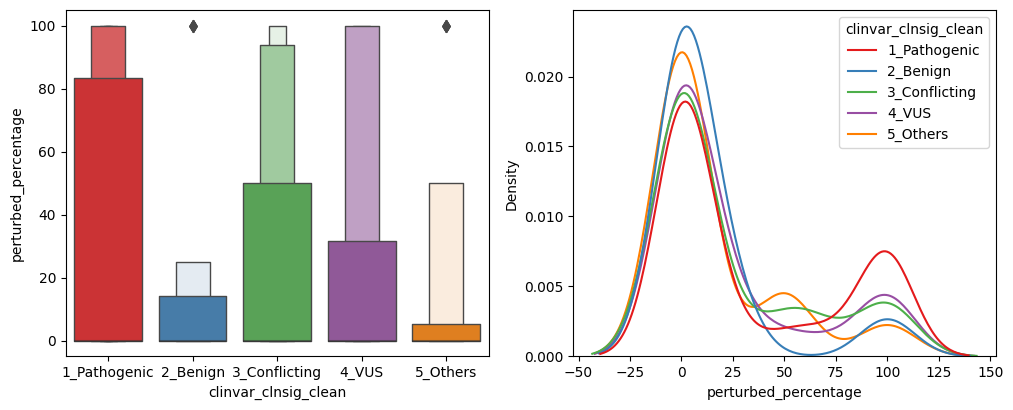

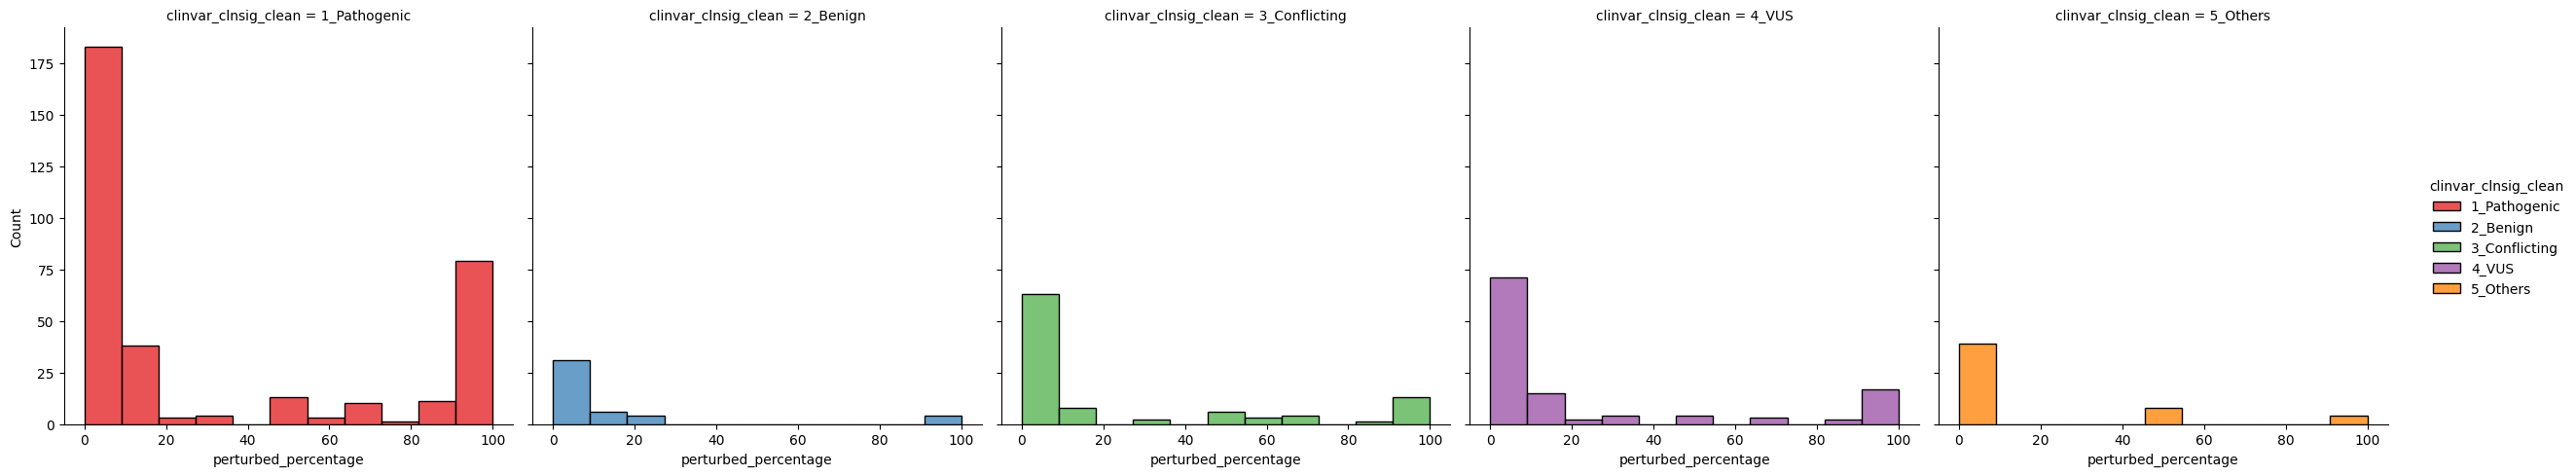

In [55]:
# edgotyping_clinvar_sum = (
#     variant_ppi_perturb_stats_clinvar
#       .group_by(["clinvar_clnsig_clean", "edgotype_wt_final"])
#       .len()
#       .sort(by="clinvar_clnsig_clean")
#       .rename({"len": "count"})
# ).with_columns(
#     pl.col("clinvar_clnsig_clean").fill_null("6_NoClinVar")
# ).to_pandas()

# # Compute the total count PER clinvar_clnsig_clean (as a Series aligned to df.index):
# totals = edgotyping_clinvar_sum.groupby("clinvar_clnsig_clean")["count"].transform("sum")

# # Now compute percentage = count ÷ total_for_that_clinvar × 100
# edgotyping_clinvar_sum["percentage"] = edgotyping_clinvar_sum["count"] / totals * 100

fig, ax = plt.subplots(1,2, figsize=(12,4.5))
sns.boxenplot(data=variant_ppi_perturb_stats_clinvar.to_pandas().sort_values(by="clinvar_clnsig_clean"),
                 x="clinvar_clnsig_clean", y="perturbed_percentage", ax=ax[0],#hue="clinvar_clnsig_clean",
                 palette="Set1", ) # hue_order=["perturbed","not perturbed","inconclusive"]

sns.kdeplot(data=variant_ppi_perturb_stats_clinvar.to_pandas().sort_values(by="clinvar_clnsig_clean"),
                 x="perturbed_percentage", hue="clinvar_clnsig_clean", common_norm=False, ax=ax[1], 
                 palette="Set1", ) # hue_order=["perturbed","not perturbed","inconclusive"]

sns.displot(data=variant_ppi_perturb_stats_clinvar.to_pandas().sort_values(by="clinvar_clnsig_clean"),
                 x="perturbed_percentage", hue="clinvar_clnsig_clean", col="clinvar_clnsig_clean", kind="hist", common_norm=False, #ax=ax, 
                 palette="Set1", ) # hue_order=["perturbed","not perturbed","inconclusive"]

# g = sns.catplot(data=variant_ppi_perturb_stats_clinvar.to_pandas().sort_values(by="clinvar_clnsig_clean"),
#                 x="clinvar_clnsig_clean", y="perturbed_percentage", hue="clinvar_clnsig_clean", kind="bar", aspect=1.5, 
#                 palette="Set1", hue_order=["perturbed","not perturbed","inconclusive"])

# g = sns.catplot(data=variant_ppi_perturb_stats_clinvar.to_pandas().sort_values(by="clinvar_clnsig_clean"),
#                 x="clinvar_clnsig_clean", y="perturbed_percentage", hue="clinvar_clnsig_clean", kind="bar", aspect=1.5, 
#                 palette="Set1", hue_order=["perturbed","not perturbed","inconclusive"])